In [6]:
import pandas as pd
import yfinance as yf
import requests

In [ ]:
def get_market_cap(symbol):
    stock = yf.Ticker(symbol)
    if stock:
        market_cap = stock.info.get("marketCap")
        if market_cap:
            return market_cap
    return None

# Ejemplo de uso
symbol = "AMZN"
market_cap = get_market_cap(symbol)
if market_cap:
    print(f"El market cap de {symbol} es: {market_cap}")
else:
    print("No se pudo obtener el market cap.")

def get_current_ratio(symbol):
    stock = yf.Ticker(symbol)
    if stock:
        balance_sheet = stock.balance_sheet
        if balance_sheet is not None and not balance_sheet.empty:
            current_assets = balance_sheet.iloc[0]['Total Current Assets']
            current_liabilities = balance_sheet.iloc[0]['Total Current Liabilities']
            if current_assets and current_liabilities:
                current_ratio = current_assets / current_liabilities
                return current_ratio
    return None

# Ejemplo de uso
symbol = "AMZN"
current_ratio = get_current_ratio(symbol)
if current_ratio:
    print(f"El current ratio de {symbol} es: {current_ratio:.2f}")
else:
    print("No se pudo obtener el current ratio.")

In [ ]:
#punto de vista fundamental

ratio de liquidez.
mide la capacidad de una empresa de pagar sus deudas en corto plazo. Capaz de transformar sus activos en efectivo de manera rápida si así lo necesita.
Hay dos: current ratio ó ratio curriente y cash ratio

- current ratio: permite conocer que tan liquida es una compañia relacionado los activos corrientes con los pasivos: current ratio = activo corrriente / pasivo corriente
                                                        CUANTO MÁS ALTO MEJOR YA QUE MÁS LIQUIDEZ AL CORTO PLAZO SI SURGE PROBLEMAS
- cash ratio: Porcentaje del pasivo corriente que se podría pagar con el efectivo y equivalentes disponibles : cash ratio = efectivo ó equivalentes / pasivo corriente. Se interpreta que si es de 
0.75% de cash ratio entonces puede cubir el 75% de sus pasivos corrientes.
                                                        CUANTO MÁS ALTO MEJOR YA QUE MÁS LIQUIDEZ AL CORTO PLAZO SI SURGE PROBLEMAS

In [ ]:

import requests

def get_current_ratio(symbol, api_key):
    url = f"https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if "annualReports" in data and len(data["annualReports"]) > 0:
            annual_reports = data["annualReports"]
            latest_report = annual_reports[0]  # Se asume que el último informe es el más reciente
            fecha = latest_report.get("fiscalDateEnding", 0)
            print(fecha)
            current_assets = float(latest_report.get("totalCurrentAssets", 0))
            current_liabilities = float(latest_report.get("totalCurrentLiabilities", 0))
            if current_liabilities != 0:
                current_ratio = current_assets / current_liabilities
                return current_ratio
    return None

# Ejemplo de uso
symbol = "GRFS"
api_key = "tu_api_key"  # Reemplaza "tu_api_key" con tu propia clave de API de Alpha Vantage
current_ratio = get_current_ratio(symbol, api_key)
if current_ratio:
    print(f"El current ratio de {symbol} es: {current_ratio:.2f}")
else:
    print("No se pudo obtener el current ratio.")

ratio de solvencia: aqui vamos a pagar sus deudas al largo plazo. 

Deuda sobre equity: (D/E) permite saber el nivel de endeudamiento de una compañía:   Deuda financiera total / Patrimonio neto. Se interpreta que si es de 2 quiere decir que la deuda financiera
dela empresa representa el 200% de su patrimonio neto.

                                                                        CUANTO MÁS BAJO MEJOR. Si es el alto ----> tiene mas deuda.

indice de endeudamiento: pasivo total / patrimonio neto. = (pasivos corrientes + pasivos no corrientes) / patrimonio total

In [6]:
def get_debt_equity(symbol, api_key):
    url = f"https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if "annualReports" in data and len(data["annualReports"]) > 0:
            annual_reports = data["annualReports"]
            latest_report = annual_reports[0]  # Se asume que el último informe es el más reciente
            fecha = latest_report.get("fiscalDateEnding", 0)
            print(fecha)
            #Calculamos deuda financiera total
            deuda_corto = float(latest_report.get("currentDebt", 0))
            deuda_largo = float(latest_report.get("longTermDebt", 0))
            deuda_total = deuda_corto + deuda_largo
            print(deuda_total)
            #Calculamos el patrimonio neto
            total_activos = float(latest_report.get("totalAssets", 0))
            total_pasivos = float(latest_report.get("totalLiabilities", 0))
            patrimonio_neto =total_activos - total_pasivos
            #Calculamos el ratio de solvencia
            ratio_debt_equity = deuda_total / patrimonio_neto
            if ratio_debt_equity != 0:
                return ratio_debt_equity

def indice_endeudamiento(symbol, api_key):
    url = f"https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if "annualReports" in data and len(data["annualReports"]) > 0:
            annual_reports = data["annualReports"]
            latest_report = annual_reports[0]  # Se asume que el último informe es el más reciente
            fecha = latest_report.get("fiscalDateEnding", 0)
            print(fecha)
            #Calculamos deuda financiera total
            pasivos_corrientes = float(latest_report.get("totalCurrentLiabilities", 0))
            pasivos_no_corrientes = float(latest_report.get("totalNonCurrentLiabilities", 0))
            pasivo_total = pasivos_corrientes + pasivos_no_corrientes
            #Calculamos el patrimonio neto
            total_activos = float(latest_report.get("totalAssets", 0))
            total_pasivos = float(latest_report.get("totalLiabilities", 0))
            patrimonio_neto =total_activos - total_pasivos
            #Calculamos el ratio de solvencia
            indice_endeudamiento = pasivo_total / patrimonio_neto
            if indice_endeudamiento != 0:
                return indice_endeudamiento
    return None




print(get_debt_equity(symbol = 'KO', api_key='a'))


In [ ]:
indice_endeudamiento(symbol = 'GRFS', api_key='a')

RATIOS DE EFICIENCIA:Que tan bien aprovecha una empresa para aprovechar sus recursos para obtener beneficios.

- rotacion del activo (asset turnover). asset_turnover = ventas ó ingresos / activo total. Permite saber que tan eficiente es la compañia frente al uso de los activos. un ratio de 1.2 significa que por cada dolar, genera 1.2 dolar de ingreso en los activos.
                                                                            CUANTO MAS ALTO MEJOR.

- rotacion del patrimonio neto (equity turnover) ventas ó ingresos / patrimonio total. Aqui sobre el patrimonio

In [ ]:
def asset_turnover(symbol, api_key):
    url = f"https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if "annualReports" in data and len(data["annualReports"]) > 0:
            annual_reports = data["annualReports"]
            latest_report = annual_reports[0]  # Se asume que el último informe es el más reciente
            fecha = latest_report.get("fiscalDateEnding", 0)
            print(fecha)
            ingresos = float(latest_report.get("currentNetReceivables", 0))
            activo_total = float(latest_report.get("totalAssets", 0))
            asset_turnover = ingresos / activo_total
            if asset_turnover != 0:
                return asset_turnover
    return None

def equityturnover(symbol, api_key):
    url = f"https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if "annualReports" in data and len(data["annualReports"]) > 0:
            annual_reports = data["annualReports"]
            latest_report = annual_reports[0]  # Se asume que el último informe es el más reciente
            fecha = latest_report.get("fiscalDateEnding", 0)
            print(fecha)
            ingresos = float(latest_report.get("currentNetReceivables", 0))

            #Calculamos el patrimonio neto
            total_activos = float(latest_report.get("totalAssets", 0))
            total_pasivos = float(latest_report.get("totalLiabilities", 0))
            patrimonio_neto = total_activos - total_pasivos

            #equityturnover
            equityturnover = ingresos / patrimonio_neto
            if equityturnover != 0:
                return equityturnover
    return None



In [ ]:
ratios de rentabilidad: que tan rentable que es una empresa. Que ganancia o perdida genera.

ROE: Tasa de rentabilidad de la empresa en relacion al capital invertido. ROE = (Resultado neto de los ultimos 12 meses / patrimonio neto) * 100

Un ROE de 100% Ó 1 significa que por cada dolar, genera 1  dolar LO MAS ALTO POSIBLE MEJOR.

MARGEN NETO (NET MARGIN). RESULTADO NETO / VENTAS ó INGRESOS. De los ingresos qué se transforma en ganancia?. Si es de 0.20 significa que por cada dolar de ventas genera 20 centavos.

MARGEN OPERATIVO RESULTADO OPERATIVO / VENTAS Ó INGRESOS. Esto lo que mide es despues de pagar los costos de las ventas y los gastos que te ha ayudado a vender eso, como por ejemplo publicidad.

In [ ]:
def ROE(symbol, api_key):
    url = f"https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if "annualReports" in data and len(data["annualReports"]) > 0:
            annual_reports = data["annualReports"]
            latest_report = annual_reports[0]  # Se asume que el último informe es el más reciente
            fecha = latest_report.get("fiscalDateEnding", 0)
            print(fecha)
            ingresos_totales = float(latest_report.get("currentNetReceivables", 0))


            if equityturnover != 0:
                return equityturnover
    return None

In [7]:
import pandas as pd

In [17]:
data = {
    'ratios': ['Current_ratio', 'D/E', 'Asset Turnover','ROE'],
    'Ebay': [1.74,1.11,0.41,-9.11],
    'alibaba': [1.42,0.31,0.44,16.23],
    'mercado libre': [1.62,1.62,0.85,-27.27],
    'Amazon':[1.08,0.63,1.71,27.92]
}
df = pd.DataFrame(data)
#df['Promedio'] = df[['Ebay', 'alibaba','mercado libre','Amazon']].mean(axis=1)
df['Promedio'] = df.iloc[:, 1:4].mean(axis=1)
print(df)


           ratios  Ebay  alibaba  mercado libre  Amazon  Promedio
0   Current_ratio  1.74     1.42           1.62    1.08  1.593333
1             D/E  1.11     0.31           1.62    0.63  1.013333
2  Asset Turnover  0.41     0.44           0.85    1.71  0.566667
3             ROE -9.11    16.23         -27.27   27.92 -6.716667


Podemos observar como el current ratio es de 1.08 por lo que podria cubrir sus deudas. Sin embargo, es más bajo que el promedio del resto de empresas.
La solvencia está mas bajo que el promedio, por lo que es buena señal.
En cuanto a la eficiencia está a más del doble que el resto, por lo que tambien es buena señal. Da mucho retorno.
El ROE tambien es excelente.

                                                        POR TANTO AMAZON ES UNA EMPRESA SOLIDA.

ratios de valuacion: sobrevaluada o subvaluada. Simplifican el proceso de valuacion y selección de acciones
EPS (Earnings per share)  Resultado neto de la empresa de los ultimos 12 meses / cantidad de acciones.                                              LO MÁS ALTO POSIBLE
PER (Price earnings) Precio sobre ganancia indica cuantas veces se está pagando el resultado neto de una compañia al comprar una accion PER ttm = PRECIO / EPS ttm
    Un per de 10 significa que la acción cotiza 10 veces sus ganancias, es decir, que cada acción se vende a 10 veces sus ganancias generadas. CUANTO MAS BAJO MEJOR YA QUE ESTARIAN MAS BAJAS
    SUS ACCIONES
PBV (Price book value) precio de mercado de una acción frente a valor contable PRECIO / patrimonio neto/numero de acciones. 
        - Si es menor a 1, indica que es subevaluada
PCF (Price cash flow). Es similar al PER pero aqui utiliza el FEO, cash flow operativo. Dicen que esto es mejor. CUANTO MAS BAJO, MAS BARATA ES LA ACCION.


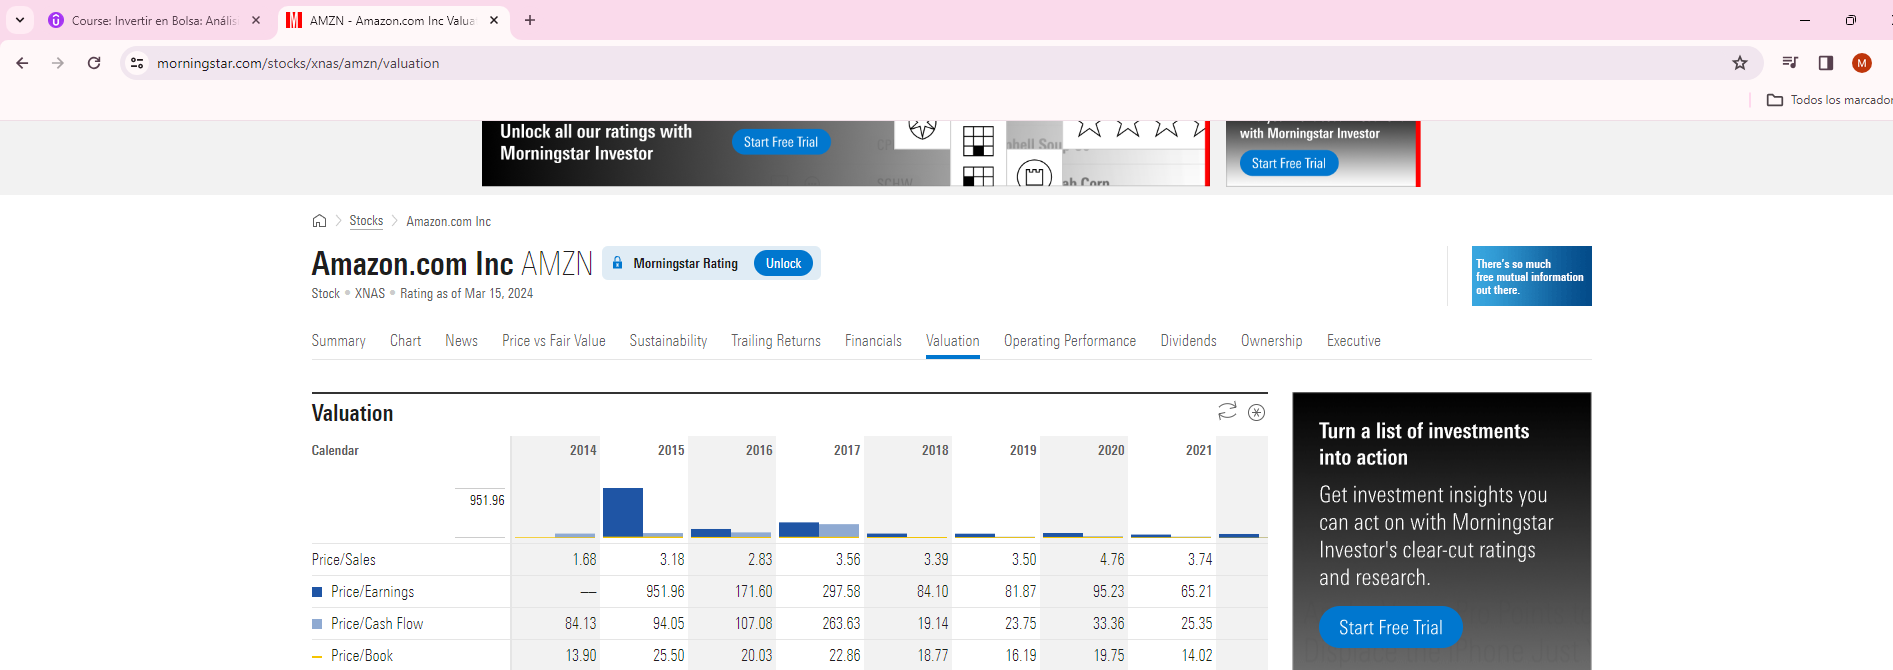

In [28]:
data = {
    'ratios': ['PCF', 'PBV'],
    'Ebay': [12.62,4.22],
    'alibaba': [20.22,6.48],
    'mercado libre': [68.02,45.27],
    'Amazon':[31.68,21.16],
    'Precio_target':[1696.2,1696.2]
}
df = pd.DataFrame(data)
df['Promedio'] = df[['Ebay', 'alibaba','mercado libre','Amazon']].mean(axis=1)
df['variacion_esperada'] = (df['Promedio']/df['Amazon'] -1)
df['Valor_esperado_accion_target'] = df['Precio_target']*(1+df['variacion_esperada'])
print(df)

  ratios   Ebay  alibaba  mercado libre  Amazon  Precio_target  Promedio  \
0    PCF  12.62    20.22          68.02   31.68         1696.2   33.1350   
1    PBV   4.22     6.48          45.27   21.16         1696.2   19.2825   

   variacion_esperada  Valor_esperado_accion_target  
0            0.045928                   1774.103125  
1           -0.088729                   1545.698322  


mis analisis:

In [30]:
data = {
    'ratios': ['PCF', 'PBV'],
    'Ebay': [11.02,4.22],
    'alibaba': [7.01,1.29],
    'mercado libre': [22.87,24.75],
    'Amazon':[18.97,8.97],
    'Precio_target':[174.42,174.42]
}
df = pd.DataFrame(data)
df['Promedio'] = df[['Ebay', 'alibaba','mercado libre','Amazon']].mean(axis=1)
df['variacion_esperada'] = (df['Promedio']/df['Amazon'] -1)
df['Valor_esperado_accion_target'] = df['Precio_target']*(1+df['variacion_esperada'])
print(df)

  ratios   Ebay  alibaba  mercado libre  Amazon  Precio_target  Promedio  \
0    PCF  11.02     7.01          22.87   18.97         174.42   14.9675   
1    PBV   4.22     1.29          24.75    8.97         174.42    9.8075   

   variacion_esperada  Valor_esperado_accion_target  
0           -0.210991                    137.618943  
1            0.093367                    190.705033  


In [34]:
((22.6/18.97 -1)+1)*174.42 #por metodo absoluto deberia salir asi.  (( 5YEARS/CURRENT -1)+1 )*VALOR ACCION

207.7960991038482

In [16]:
import yfinance as yf

# Obtener datos financieros de Amazon
amazon = yf.Ticker("GRFS")

# Obtener el Price-Earnings Ratio (PER)
pe_ratio = amazon.info['trailingPE']

# Obtener el flujo de efectivo operativo
operating_cash_flow = amazon.info['operatingCashflow']

# Obtener el número total de acciones en circulación
shares_outstanding = amazon.info['sharesOutstanding']

# Obtener el precio de la acción
stock_price = amazon.info['previousClose']

# Calcular el flujo de efectivo operativo por acción
if operating_cash_flow is not None and shares_outstanding is not None:
    operating_cash_flow_per_share = operating_cash_flow / shares_outstanding
else:
    operating_cash_flow_per_share = None

# Calcular el Price-Cash Flow Ratio
pcf_ratio = stock_price / operating_cash_flow_per_share if operating_cash_flow_per_share else None

# Obtener el Price-Book Ratio
pb_ratio = amazon.info['priceToBook']

print("Price-Earnings Ratio (PER):", pe_ratio)

# Añadir el PER del total de 5 años
pe_ratio_5yr = amazon.info['forwardPE']
print("PER del total de 5 años:", pe_ratio_5yr)

print("Price-Cash Flow Ratio:", pcf_ratio)
print("Price-Book Ratio:", pb_ratio)

Price-Earnings Ratio (PER): 61.3
PER del total de 5 años: 4.9435487
Price-Cash Flow Ratio: 18.780071275329384
Price-Book Ratio: 0.71436894


### EMPRESAS SEMICONDUCTORES

In [8]:
data = {
    'ratios': ['PCF', 'PBV'],
    'AMD': [50.53,4.24],
    'Intel': [10.26,1.37],
    'Qualcomm': [17.37,7.64],
    'Nvidia':[59.74,43.69],
    'Precio_target':[762,762]
}
df = pd.DataFrame(data)
df['Promedio'] = df[['AMD', 'Intel','Qualcomm','Nvidia']].mean(axis=1)
df['variacion_esperada'] = (df['Promedio']/df['Nvidia'] -1)
df['Valor_esperado_accion_target'] = df['Precio_target']*(1+df['variacion_esperada'])
print(df)

  ratios    AMD  Intel  Qualcomm  Nvidia  Precio_target  Promedio  \
0    PCF  50.53  10.26     17.37   59.74            762    34.475   
1    PBV   4.24   1.37      7.64   43.69            762    14.235   

   variacion_esperada  Valor_esperado_accion_target  
0           -0.422916                    439.738031  
1           -0.674182                    248.273518  


In [11]:
(( 47.72/68.86 -1)+1 )*878.37 #DEL PRICE CASH FLOW

608.71066511763

### EMPRESAS COMO GRIFOLS

In [18]:
data = {
    'ratios': ['PCF', 'PBV'],
    'CSL': [33.55,5.37],
    'SNY': [11.81,1.58],
    'BAX': [2.51,15.19],
    'GRF':[23.37,0.71],
    'Precio_target':[7.53,7.53]
}
df = pd.DataFrame(data)
df['Promedio'] = df[['CSL', 'SNY','BAX','GRF']].mean(axis=1)
df['variacion_esperada'] = (df['Promedio']/df['GRF'] -1)
df['Valor_esperado_accion_target'] = df['Precio_target']*(1+df['variacion_esperada'])
df

,ratios,CSL,SNY,BAX,GRF,Precio_target,Promedio,variacion_esperada,Valor_esperado_accion_target
0,PCF,33.55,11.81,2.51,23.37,7.53,17.8100,-0.237912,5.738524
1,PBV,5.37,1.58,15.19,0.71,7.53,5.7125,7.045775,60.584683


In [19]:
(( 4.9435487/23.37 -1)+1 )*7.53 #DEL PRICE CASH FLOW 

1.5928507364569964

### EMPRESAS CHINAS CHIPS

In [6]:
data = {
    'ratios': ['PCF', 'PBV'],
    'square_enix': [48.47,1.895],
    'nintendo': [18.73,3.6],
    'konami':[14.24,2.6],
    'capcom':[18.44,5.41],
    'Precio_target':[2.2704,2.2704]
}
df = pd.DataFrame(data)
df['Promedio'] = df[['square_enix', 'nintendo','konami','capcom']].mean(axis=1)
df['variacion_esperada'] = (df['Promedio']/df['capcom'] -1)
df['Valor_esperado_accion_target'] = df['Precio_target']*(1+df['variacion_esperada'])
df

,ratios,square_enix,nintendo,konami,capcom,Precio_target,Promedio,variacion_esperada,Valor_esperado_accion_target
0,PCF,48.470,18.73,14.24,18.44,2.2704,24.97000,0.354121,3.074397
1,PBV,1.895,3.60,2.60,5.41,2.2704,3.37625,-0.375924,1.416902


### EMPRESAS CAPCOM

In [ ]:
data = {
    'ratios': ['PCF', 'PBV'],
    'MetaX': [],
    'Biren Technology': [],
    'Moore Threads': [],
    'Innosilicon':[],
    'Zhaoxin':[],
    'Iluvatar ':[],
    'CoreX ':[],
    'DenglinAI  ':[],
    'Vast AI Tech ':[],
    'Precio_target':[]
}
df = pd.DataFrame(data)
df['Promedio'] = df[['CSL', 'SNY','BAX','GRF']].mean(axis=1)
df['variacion_esperada'] = (df['Promedio']/df['GRF'] -1)
df['Valor_esperado_accion_target'] = df['Precio_target']*(1+df['variacion_esperada'])
df

telefonica

In [10]:
data = {
    'ratios': ['PCF', 'PBV'],
    'telus': [6.60,1.99],
    'vodafone': [2.34,0.58],
    'orange': [2.3,0.9],
    'at':[2.94,1.14],
    'telefonica':[1.97,1.03],
    'Precio_target':[4.01,4.01]
}
df = pd.DataFrame(data)
df['Promedio'] = df[['telus', 'vodafone','orange','at','telefonica']].mean(axis=1)
df['variacion_esperada'] = (df['Promedio']/df['telefonica'] -1)
df['Valor_esperado_accion_target'] = df['Precio_target']*(1+df['variacion_esperada'])
print(df)

  ratios  telus  vodafone  orange    at  telefonica  Precio_target  Promedio  \
0    PCF   6.60      2.34     2.3  2.94        1.97           4.01     3.230   
1    PBV   1.99      0.58     0.9  1.14        1.03           4.01     1.128   

   variacion_esperada  Valor_esperado_accion_target  
0            0.639594                      6.574772  
1            0.095146                      4.391534  


In [3]:
def calcular_interes(valor, tasa, periodos):
    # Caso base: cuando alcanzamos el último período
    if periodos == 0:
        return valor
    # Cálculo recursivo del valor después de un período
    nuevo_valor = valor * tasa
    # Llamada recursiva con un período menos
    return calcular_interes(nuevo_valor, tasa, periodos - 1)

# Definir los valores iniciales
valor_inicial = 15700
tasa = 1 + 0.04/12
num_periodos = 19  # Número de veces que se aplicará la tasa

# Iterar sobre los periodos
for periodo in range(num_periodos):
    valor_final = calcular_interes(valor_inicial, tasa, periodo + 1)
    print(f"Valor después del período {periodo + 1}: {valor_final}")

Valor después del período 1: 15752.333333333334
Valor después del período 2: 15804.841111111113
Valor después del período 3: 15857.523914814818
Valor después del período 4: 15910.382327864201
Valor después del período 5: 15963.416935623749
Valor después del período 6: 16016.628325409163
Valor después del período 7: 16070.017086493861
Valor después del período 8: 16123.583810115508
Valor después del período 9: 16177.32908948256
Valor después del período 10: 16231.253519780837
Valor después del período 11: 16285.357698180109
Valor después del período 12: 16339.64222384071
Valor después del período 13: 16394.10769792018
Valor después del período 14: 16448.754723579914
Valor después del período 15: 16503.583905991847
Valor después del período 16: 16558.595852345155
Valor después del período 17: 16613.791171852972
Valor después del período 18: 16669.17047575915
Valor después del período 19: 16724.734377345016


In [4]:
50-50*0.19

40.5